# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [4]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

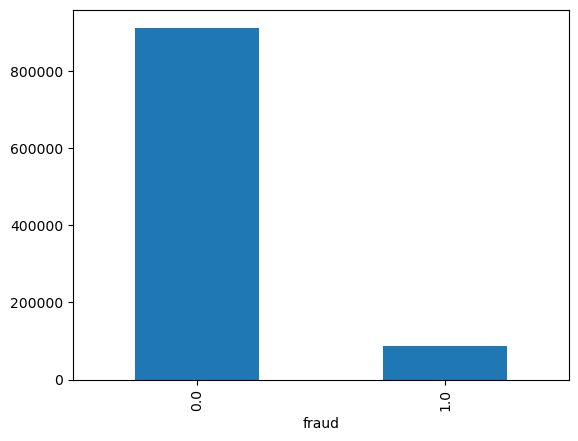

In [5]:
isFraud = fraud["fraud"].value_counts()
isFraud.plot(kind="bar")
plt.show()

In [6]:
#Yes, there is an imbalanced on the target variable "Fraud"

In [7]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression()

In [10]:
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
log_reg.score(X_test_scaled, y_test)

0.958584

In [13]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228012
         1.0       0.89      0.60      0.72     21988

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [14]:
#Accuracy looks good (96%) but is misleading because the minority class (1) is poorly detected.
#Class 1 recall is low (0.60), meaning the model misses 40% of important cases.
#The correct metric to judge this model is the F1 or Recall of class 1.
#Overall: the model is NOT good enough for the important minority class

In [15]:
#Oversampling
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [16]:
train["fraud"] = y_train.values

In [19]:
notLegit = train[train["fraud"] == 1]
legit = train[train["fraud"] == 0]

In [29]:
oversampled = resample(notLegit, 
                                    replace=True, 
                                    n_samples = len(legit),
                                    random_state=0)

In [30]:
train_over = pd.concat([oversampled, legit])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31156,-0.373223,-0.041955,1.892044,0.366179,-0.734797,-0.334125,0.732499,1.0
497815,-0.393950,-0.157944,6.279546,-2.730907,-0.734797,-0.334125,0.732499,1.0
486986,-0.218926,2.070438,-0.404423,0.366179,-0.734797,-0.334125,0.732499,1.0
599569,2.093486,-0.155283,0.016516,0.366179,-0.734797,-0.334125,0.732499,1.0
524341,-0.317948,-0.185206,0.780315,0.366179,-0.734797,-0.334125,0.732499,1.0
...,...,...,...,...,...,...,...,...
749995,-0.355574,-0.185070,0.153048,0.366179,-0.734797,-0.334125,-1.365190,0.0
749996,-0.336741,0.189811,-0.296313,0.366179,1.360919,-0.334125,0.732499,0.0
749997,-0.407612,0.044620,-0.475900,-2.730907,1.360919,-0.334125,0.732499,0.0
749998,-0.341544,-0.022819,-0.589208,0.366179,-0.734797,-0.334125,0.732499,0.0


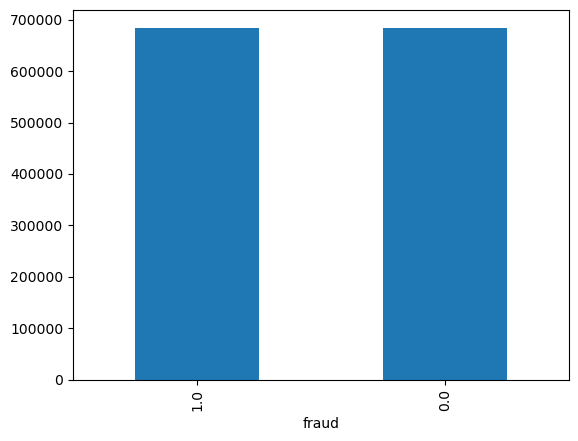

In [31]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [32]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228012
         1.0       0.58      0.95      0.72     21988

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



c:\Users\NocTo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Recall increased massively → the model now catches almost all class-1 cases.
#Precision dropped → more false positives.
#F1 stayed the same, but if recall is your priority, the model is clearly better after oversampling.
#Bottom line: Oversampling improved detection of the minority class.

In [36]:
undersampled = resample(legit, 
                                    replace=False, 
                                    n_samples = len(notLegit),
                                    random_state=0)
undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
112538,0.470925,4.021961,0.175198,0.366179,1.360919,-0.334125,0.732499,0.0
495886,-0.377955,0.042923,-0.473951,0.366179,-0.734797,-0.334125,-1.365190,0.0
33825,-0.086295,-0.186359,1.722148,0.366179,-0.734797,2.992889,0.732499,0.0
742955,-0.161990,-0.080626,-0.314854,0.366179,-0.734797,-0.334125,-1.365190,0.0
236892,-0.054094,0.776183,0.169331,0.366179,-0.734797,-0.334125,-1.365190,0.0
...,...,...,...,...,...,...,...,...
547269,-0.248806,-0.185940,-0.483898,0.366179,1.360919,-0.334125,0.732499,0.0
724445,-0.372504,-0.173345,-0.417376,0.366179,-0.734797,2.992889,0.732499,0.0
710351,-0.297710,-0.182768,-0.484560,0.366179,-0.734797,-0.334125,0.732499,0.0
109616,1.095132,-0.102919,-0.282305,0.366179,1.360919,-0.334125,0.732499,0.0


In [37]:
train_under = pd.concat([undersampled, notLegit])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
112538,0.470925,4.021961,0.175198,0.366179,1.360919,-0.334125,0.732499,0.0
495886,-0.377955,0.042923,-0.473951,0.366179,-0.734797,-0.334125,-1.365190,0.0
33825,-0.086295,-0.186359,1.722148,0.366179,-0.734797,2.992889,0.732499,0.0
742955,-0.161990,-0.080626,-0.314854,0.366179,-0.734797,-0.334125,-1.365190,0.0
236892,-0.054094,0.776183,0.169331,0.366179,-0.734797,-0.334125,-1.365190,0.0
...,...,...,...,...,...,...,...,...
749915,-0.178724,3.152188,1.250259,0.366179,-0.734797,2.992889,0.732499,1.0
749916,0.089574,-0.180213,1.396101,0.366179,1.360919,-0.334125,0.732499,1.0
749927,-0.193890,-0.188752,0.843346,0.366179,-0.734797,-0.334125,0.732499,1.0
749959,1.549933,-0.180095,-0.621935,0.366179,-0.734797,-0.334125,0.732499,1.0


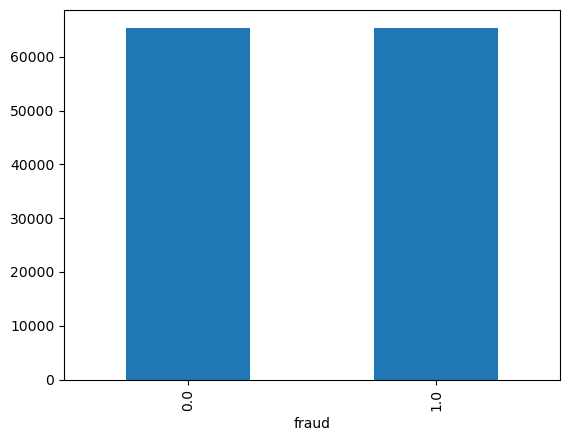

In [38]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [39]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228012
         1.0       0.58      0.95      0.72     21988

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



c:\Users\NocTo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#It didnt change anything...

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [50]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [51]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
LogisticRegression(max_iter=1000)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228012
         1.0       0.58      0.95      0.72     21988

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
#Once again nothing changed